In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from pyarrow import feather

In [2]:
data=pd.read_csv(r"C:\Users\KASHISH\Downloads\archive (2)\fraudTrain.csv")
%timeit data.to_parquet('fraudTrain.parquet')
%timeit data_parquet=pd.read_parquet('fraudTrain.parquet')

9.13 s ± 418 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.88 s ± 68.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [3]:
print(data.head())

   Index trans_date_trans_time        cc_num  \
0      0         1/1/2019 0:00  2.703190e+15   
1      1         1/1/2019 0:00  6.304230e+11   
2      2         1/1/2019 0:00  3.885950e+13   
3      3         1/1/2019 0:01  3.534090e+15   
4      4         1/1/2019 0:03  3.755340e+14   

                             merchant       category     amt      first  \
0          fraud_Rippin, Kub and Mann       misc_net    4.97   Jennifer   
1     fraud_Heller, Gutmann and Zieme    grocery_pos  107.23  Stephanie   
2                fraud_Lind-Buckridge  entertainment  220.11     Edward   
3  fraud_Kutch, Hermiston and Farrell  gas_transport   45.00     Jeremy   
4                 fraud_Keeling-Crist       misc_pos   41.96      Tyler   

      last gender                        street  ...      lat      long  \
0    Banks      F                561 Perry Cove  ...  36.0788  -81.1781   
1     Gill      F  43039 Riley Greens Suite 393  ...  48.8878 -118.2105   
2  Sanchez      M      594 White Da

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Index                  1048575 non-null  int64  
 1   trans_date_trans_time  1048575 non-null  object 
 2   cc_num                 1048575 non-null  float64
 3   merchant               1048575 non-null  object 
 4   category               1048575 non-null  object 
 5   amt                    1048575 non-null  float64
 6   first                  1048575 non-null  object 
 7   last                   1048575 non-null  object 
 8   gender                 1048575 non-null  object 
 9   street                 1048575 non-null  object 
 10  city                   1048575 non-null  object 
 11  state                  1048575 non-null  object 
 12  zip                    1048575 non-null  int64  
 13  lat                    1048575 non-null  float64
 14  long              

In [5]:
print(data.isnull().sum())

Index                    0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


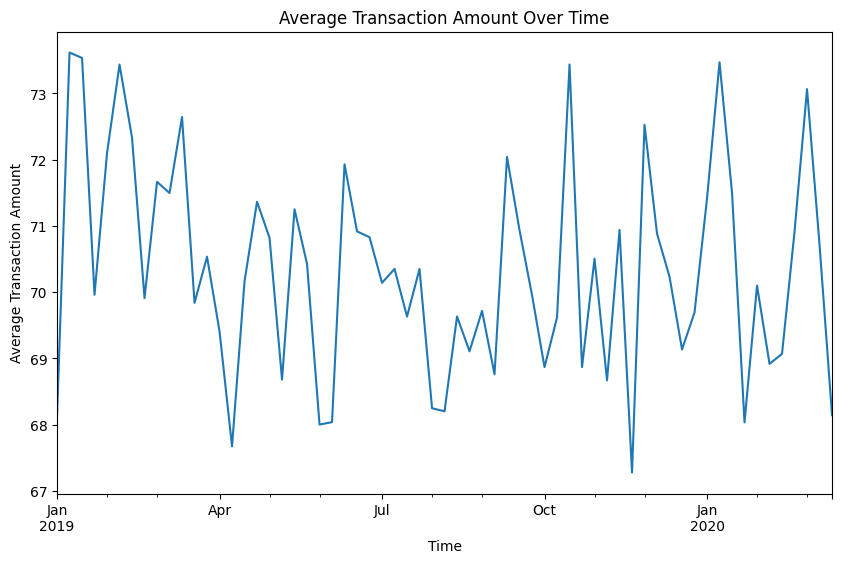

In [7]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
plt.figure(figsize=(10, 6))
data.set_index('trans_date_trans_time')['amt'].resample('W').mean().plot()
plt.title("Average Transaction Amount Over Time")
plt.xlabel("Time")
plt.ylabel("Average Transaction Amount")
plt.show()

C:\Users\KASHISH\AppData\Local\Temp\ipykernel_14596\1122146596.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_fraud', y='amt', data=data, palette='Set2')


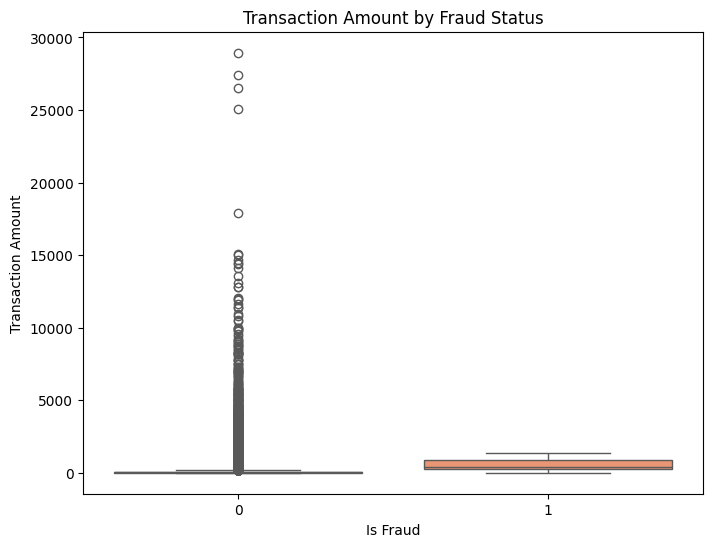

In [9]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_fraud', y='amt', data=data, palette='Set2')
plt.title("Transaction Amount by Fraud Status")
plt.xlabel("Is Fraud")
plt.ylabel("Transaction Amount")
plt.show()

In [10]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['dob'] = pd.to_datetime(data['dob'])




In [11]:
data['age'] = (data['trans_date_trans_time'] - data['dob']).dt.days // 365  # Calculate age from DOB

In [12]:
data.drop(columns=['trans_date_trans_time', 'dob', 'first', 'last', 'street', 'city', 'state', 'zip', 
                   'merchant', 'trans_num'], inplace=True)

In [13]:
data = pd.get_dummies(data, columns=['gender', 'category', 'job'], drop_first=True)

In [14]:
data.fillna(data.mean(), inplace=True) 

In [15]:
X = data.drop(columns=['is_fraud', 'Index'])  # Features
y = data['is_fraud']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
rf_model = RandomForestClassifier(n_estimators=50,n_jobs=-1, random_state=42)


In [20]:
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

In [21]:
y_pred = rf_model.predict(X_test_scaled)

In [22]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.9976062751829864



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    208534
           1       0.92      0.63      0.75      1181

    accuracy                           1.00    209715
   macro avg       0.96      0.81      0.87    209715
weighted avg       1.00      1.00      1.00    209715



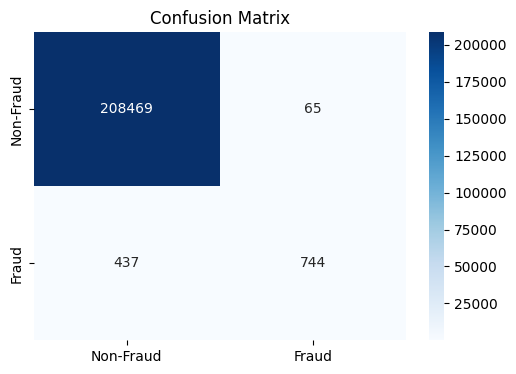

In [23]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix")
plt.show()

In [24]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
print(f'\nROC-AUC Score: {roc_auc}')



ROC-AUC Score: 0.9730655199211864


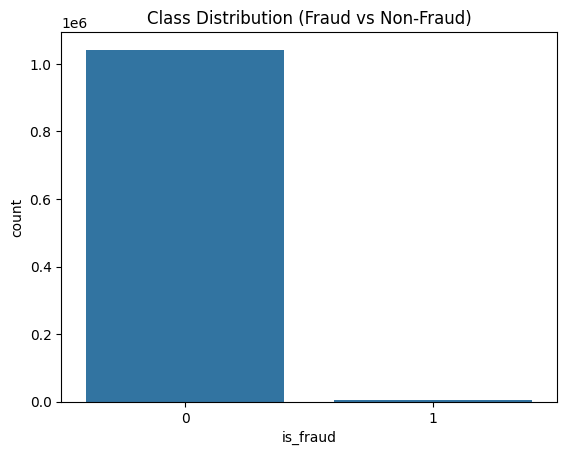

In [25]:
sns.countplot(x='is_fraud', data=data)
plt.title("Class Distribution (Fraud vs Non-Fraud)")
plt.show()
